In [1]:
import pandas as pd
import numpy as np
excel_file = 'survey_response_excel.xlsx'
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
df = pd.read_excel(excel_file)
# remove later grades due to lack of data 
grades_to_exclude = ['4th', '4th year student overall ', '5th']
df = df[~df['What is your current year level'].isin(grades_to_exclude)]

In [10]:
# Clean up data in for area of majors
specialisation_column = 'What is your specialisation/major if applicable?'
degree_column = 'What is your degree? '

# for software
mask = df[specialisation_column].str.contains('software|computer|cyber|data|machine|interaction|programming|system|electronic|ML|IT|info', case=False, na=False)
df.loc[mask, specialisation_column] = 'Software'
# for electrical
mask = df[specialisation_column].str.contains('electrical|biomedical', case=False, na=False)
df.loc[mask, specialisation_column] = 'Electrical'
# for chemical
mask = df[specialisation_column].str.contains('chem|materials|metal|bioprocess|environmental|metallurgical', case=False, na=False)
df.loc[mask, specialisation_column] = 'Chemical'
# for civil
mask = df[specialisation_column].str.contains('civil|materials|geo|mining|structural|transport|water|marine', case=False, na=False)
df.loc[mask, specialisation_column] = 'Civil'
# for mechanical
mask = df[specialisation_column].str.contains('mechanical|aero|mech', case=False, na=False)
df.loc[mask, specialisation_column] = 'Mechanical'
# for mechatronics
mask = df[specialisation_column].str.contains('mechatronic|metr', case=False, na=False)
df.loc[mask, specialisation_column] = 'Mechanical'

# map to the degree column, ignoring n/a options
replacement_conditions = (
    (df['What is your specialisation/major if applicable?'].isin(['Software', 'Electrical', 'Chemical', 'Civil', 'Mechanical', 'Mechatronics'])) 
)
df['What is your degree? '] = np.where(replacement_conditions, df['What is your specialisation/major if applicable?'], df['What is your degree? '])

# replace the n/a options in the degree column
mask = df[degree_column].str.contains('computer|tech|software|data|interaction', case=False, na=False)
df.loc[mask, degree_column] = 'Software'
mask = df[degree_column].str.contains('regional|urban', case=False, na=False)
df.loc[mask, degree_column] = 'Design or Planning'
mask = df[degree_column].str.contains('BE|engineering', case=False, na=False)
df.loc[mask, degree_column] = 'No Major (Engineering)'

# check mask
# print(df[['What is your degree? ', 'What is your specialisation/major if applicable?']].head(20))
# print(df[['What is your degree? ', 'What is your specialisation/major if applicable?']].tail(20))

In [ ]:
# Welbeing

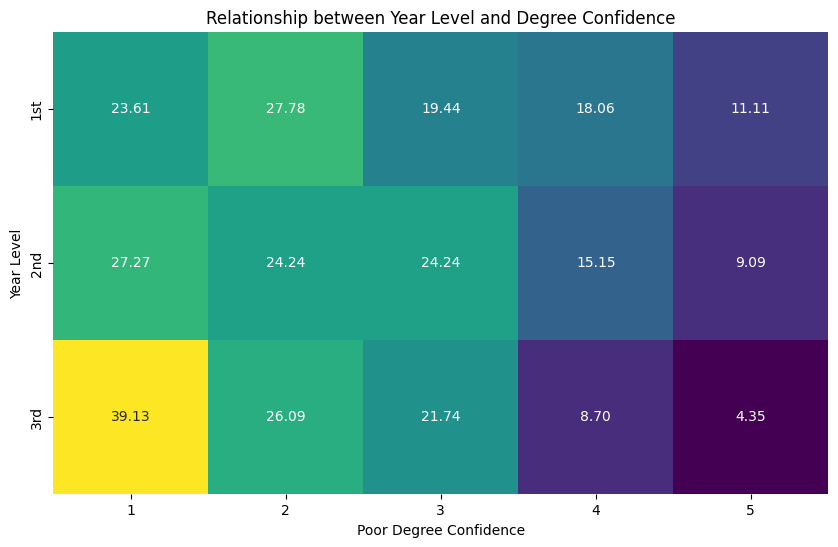

In [24]:
# Year Level and Poor Degree Confidence
yrLevel_degreeConfidence = pd.crosstab(df['What is your current year level'], df['How often do you think about switching out of my degree/specialization/major?'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_degreeConfidence, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and Degree Confidence')
plt.xlabel('Poor Degree Confidence')
plt.ylabel('Year Level')
plt.show()

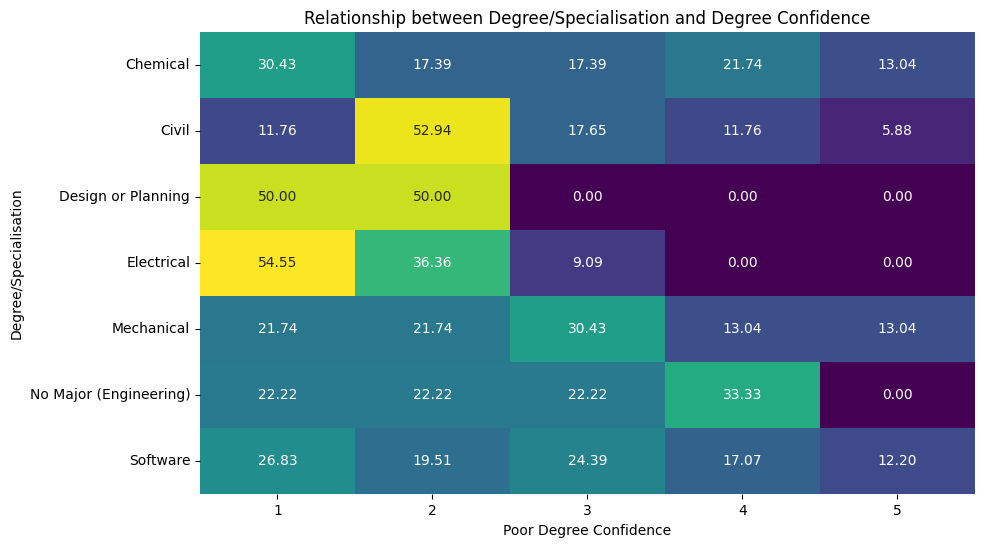

In [25]:
# Degree/Specialisation and Poor Degree Confidence
degree_degreeConfidence = pd.crosstab(df['What is your degree? '], df['How often do you think about switching out of my degree/specialization/major?'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(degree_degreeConfidence, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Degree/Specialisation and Degree Confidence')
plt.xlabel('Poor Degree Confidence')
plt.ylabel('Degree/Specialisation')
plt.show()

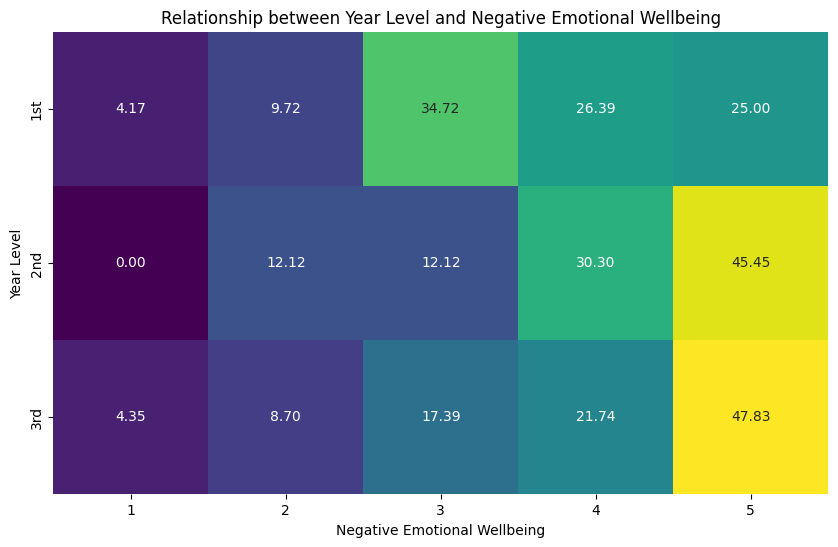

In [13]:
# Year Level and Overall Negative Emotional Experience (overwhelmed/stressed/tired)
yrLevel_negEmotionalExp = pd.crosstab(df['What is your current year level'], df['I feel overwhelmed/stressed/tired as a result of university throughout the entire semester (i.e., not just during exam periods)'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_negEmotionalExp, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and Negative Emotional Wellbeing')
plt.xlabel('Negative Emotional Wellbeing')
plt.ylabel('Year Level')
plt.show()

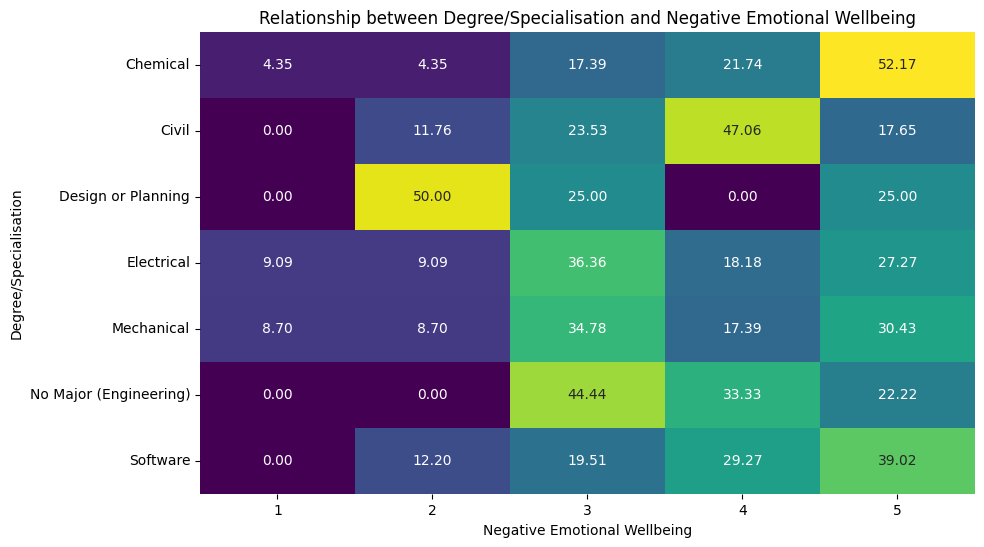

In [26]:
# Degree/Specialisation and Overall Negative Emotional Experience (overwhelmed/stressed/tired)
degree_negEmotionalExp = pd.crosstab(df['What is your degree? '], df['I feel overwhelmed/stressed/tired as a result of university throughout the entire semester (i.e., not just during exam periods)'], normalize='index') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(degree_negEmotionalExp, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Degree/Specialisation and Negative Emotional Wellbeing')
plt.xlabel('Negative Emotional Wellbeing')
plt.ylabel('Degree/Specialisation')
plt.show()

In [ ]:
# Access to support services

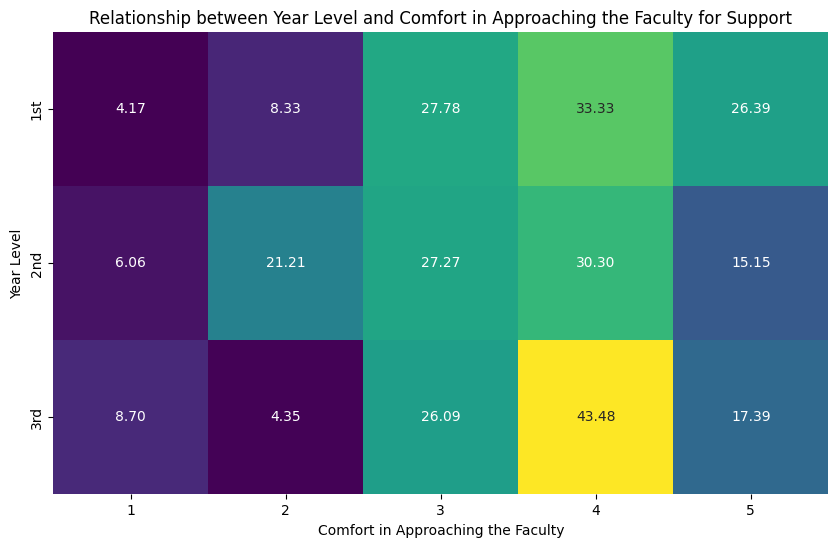

In [27]:
# Year Level and Approaching the Faculty
yrLevel_approachingFaculty = pd.crosstab(df['What is your current year level'], df['I would feel comfortable approaching the EAIT faculty for academic advice, guidance, and support.'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_approachingFaculty, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and Comfort in Approaching the Faculty for Support')
plt.xlabel('Comfort in Approaching the Faculty')
plt.ylabel('Year Level')
plt.show()

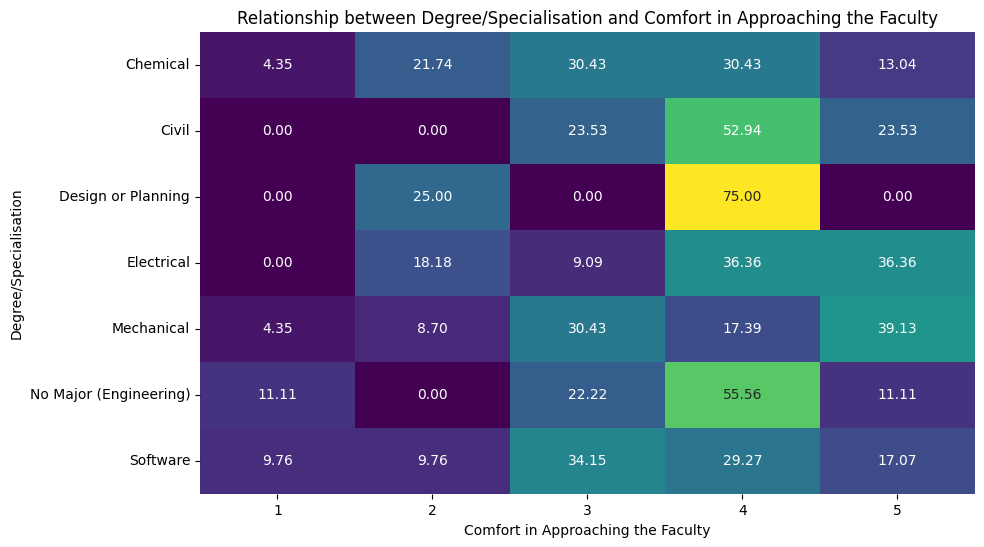

In [28]:
# Degree/Specialisation and Approaching the Faculty
degree_approachingFaculty = pd.crosstab(df['What is your degree? '], df['I would feel comfortable approaching the EAIT faculty for academic advice, guidance, and support.'], normalize='index') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(degree_approachingFaculty, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Degree/Specialisation and Comfort in Approaching the Faculty')
plt.xlabel('Comfort in Approaching the Faculty')
plt.ylabel('Degree/Specialisation')
plt.show()

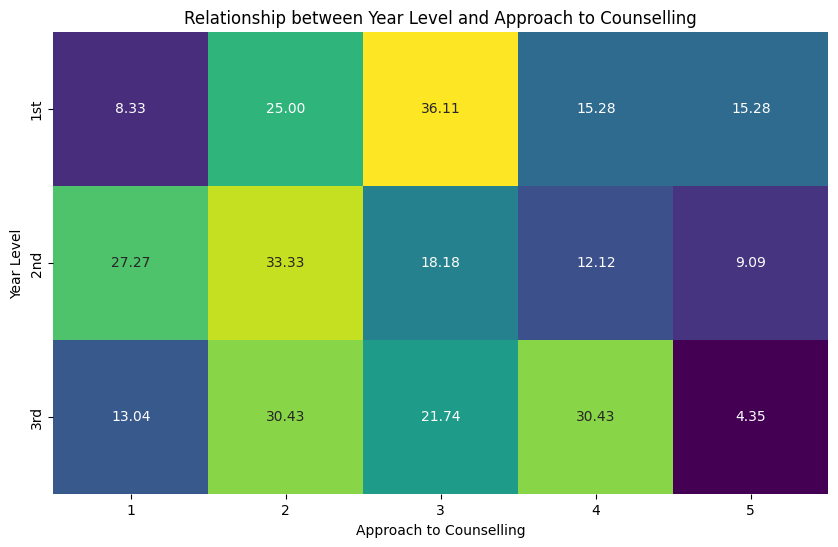

In [16]:
# Year Level and Counsellling
yrLevel_counselling = pd.crosstab(df['What is your current year level'], df['I know about the counselling services for students and feel comfortable in going'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_counselling, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and Approach to Counselling')
plt.xlabel('Approach to Counselling')
plt.ylabel('Year Level')
plt.show()

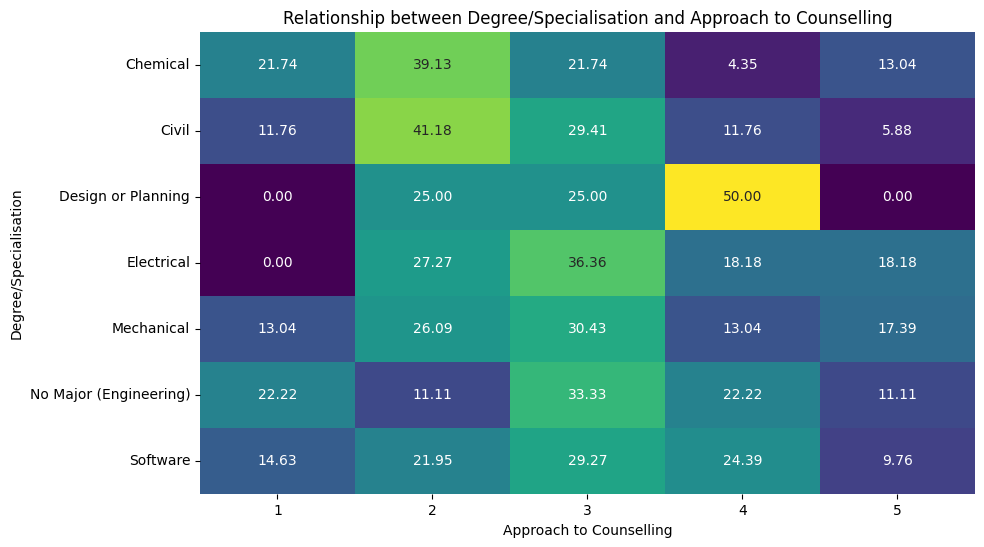

In [30]:
# Degree/Specialisation and Counsellling
degree_counselling = pd.crosstab(df['What is your degree? '], df['I know about the counselling services for students and feel comfortable in going'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(degree_counselling, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Degree/Specialisation and Approach to Counselling')
plt.xlabel('Approach to Counselling')
plt.ylabel('Degree/Specialisation')
plt.show()

In [ ]:
# Social engagement 

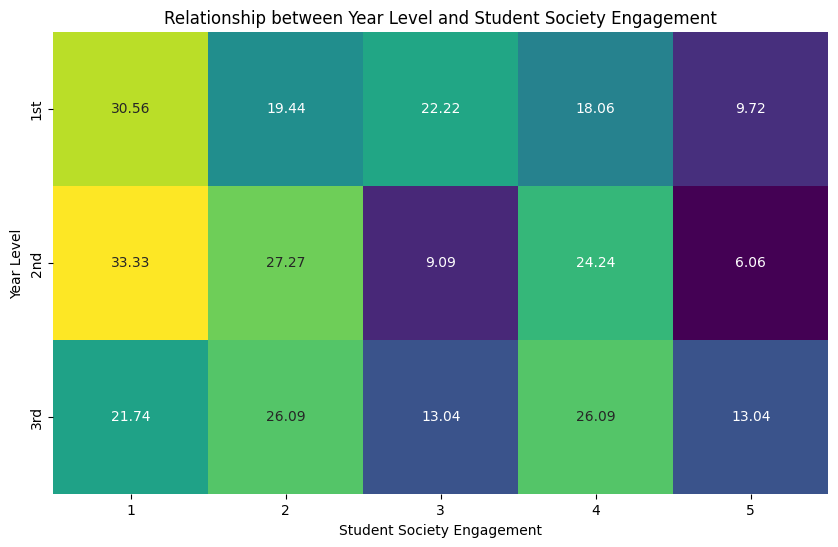

In [17]:
# Year Level and Student Society Engagement
yrLevel_studentSociety = pd.crosstab(df['What is your current year level'], df['I am actively involved in the student societies related to my degree (e.g., EUS and its sub-clubs)'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_studentSociety, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and Student Society Engagement')
plt.xlabel('Student Society Engagement')
plt.ylabel('Year Level')
plt.show()

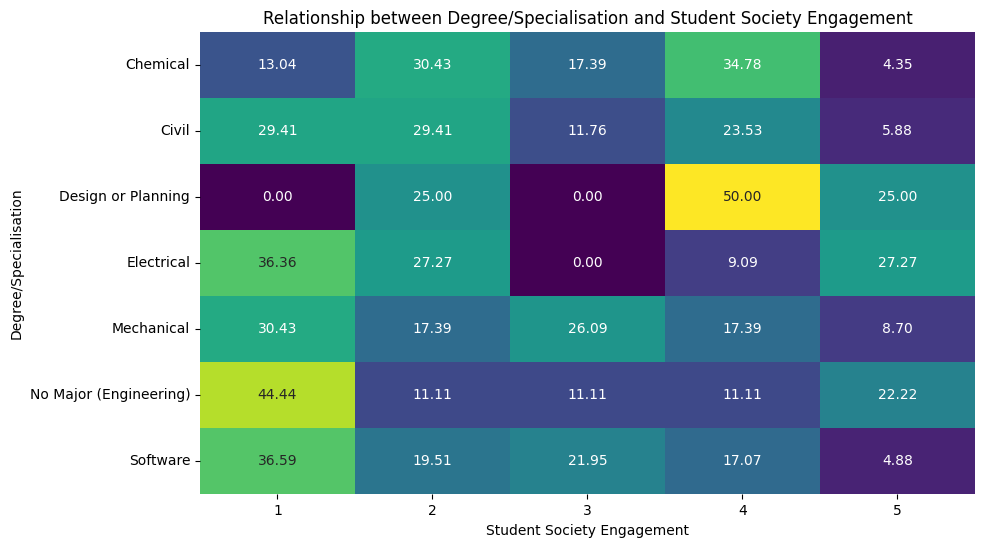

In [29]:
# Degree/Specialisation and Student Society Engagement
degree_studentSociety = pd.crosstab(df['What is your degree? '], df['I am actively involved in the student societies related to my degree (e.g., EUS and its sub-clubs)'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(degree_studentSociety, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Degree/Specialisation and Student Society Engagement')
plt.xlabel('Student Society Engagement')
plt.ylabel('Degree/Specialisation')
plt.show()

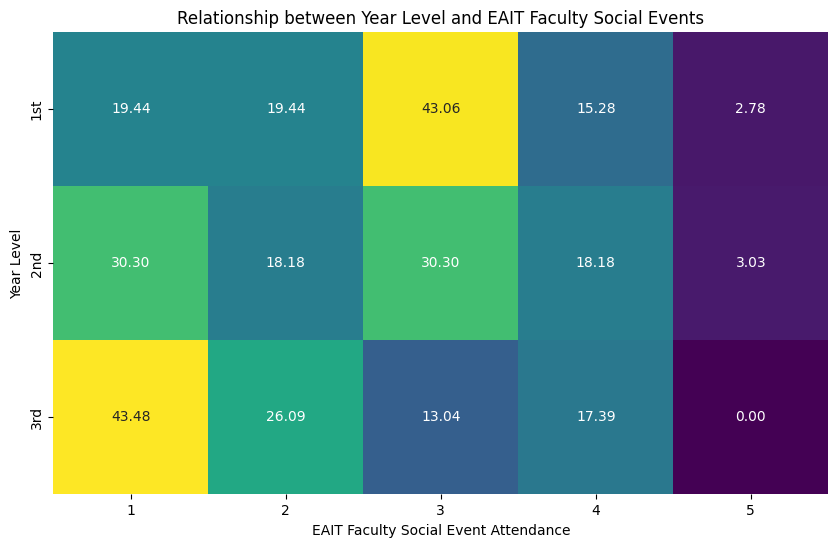

In [18]:
# Year Level and EAIT Social Events
yrLevel_EAITSocial = pd.crosstab(df['What is your current year level'], df['I attend social events organised by EAIT faculty? '], normalize='index') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_EAITSocial, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and EAIT Faculty Social Events')
plt.xlabel('EAIT Faculty Social Event Attendance')
plt.ylabel('Year Level')
plt.show()

In [ ]:
# Career Engagement

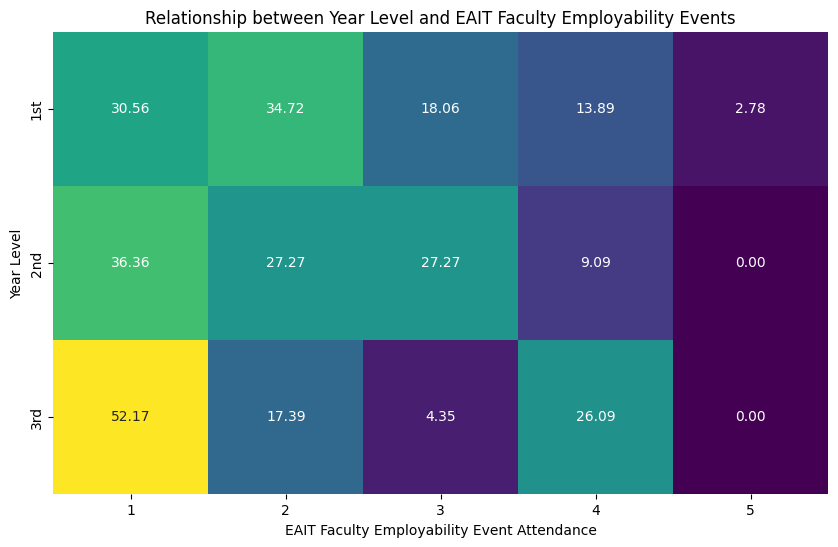

In [20]:
# Year Level and EAIT Employability
yrLevel_Employability_table = pd.crosstab(df['What is your current year level'], df['How often do you attend the employability events organized by the EAIT Faculty?'], normalize='index') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_Employability_table, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and EAIT Faculty Employability Events')
plt.xlabel('EAIT Faculty Employability Event Attendance')
plt.ylabel('Year Level')
plt.show()

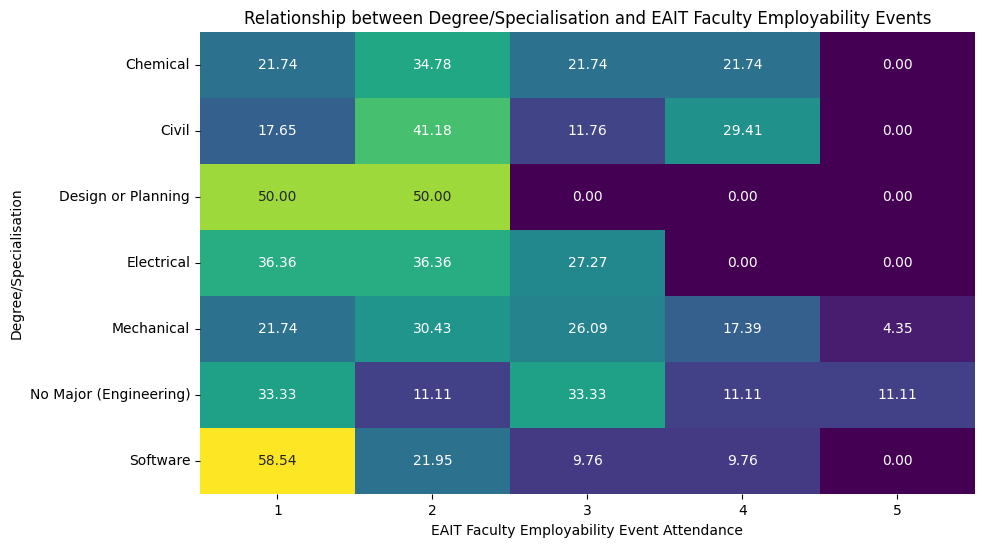

In [19]:
# Degree/Specialisation and EAIT Employability
degree_Employability_table = pd.crosstab(df['What is your degree? '], df['How often do you attend the employability events organized by the EAIT Faculty?'], normalize='index') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(degree_Employability_table, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Degree/Specialisation and EAIT Faculty Employability Events')
plt.xlabel('EAIT Faculty Employability Event Attendance')
plt.ylabel('Degree/Specialisation')
plt.show()

In [ ]:
# Sense of Belonging

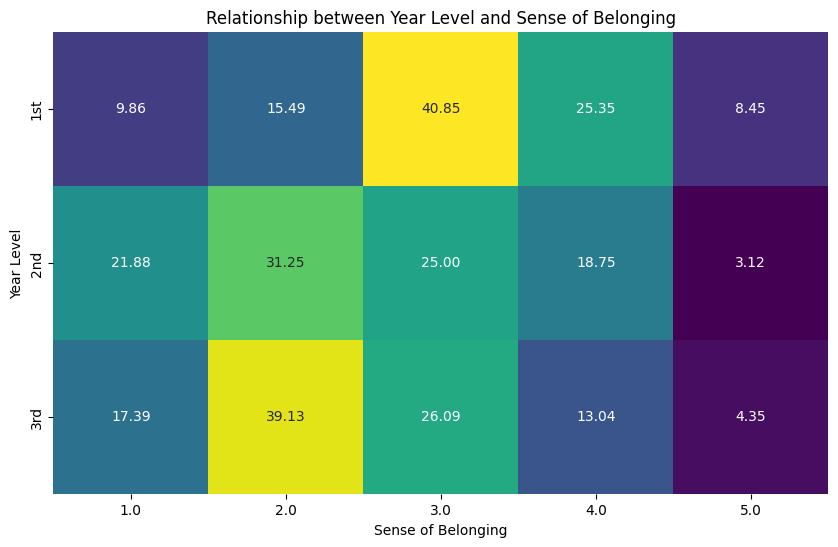

In [21]:
# Year Level and Sense of Belonging
yrLevel_belonging = pd.crosstab(df['What is your current year level'], df['How much do you feel a sense of belonging in EAIT faculty?'], normalize='index') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(yrLevel_belonging, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Year Level and Sense of Belonging')
plt.xlabel('Sense of Belonging')
plt.ylabel('Year Level')
plt.show()

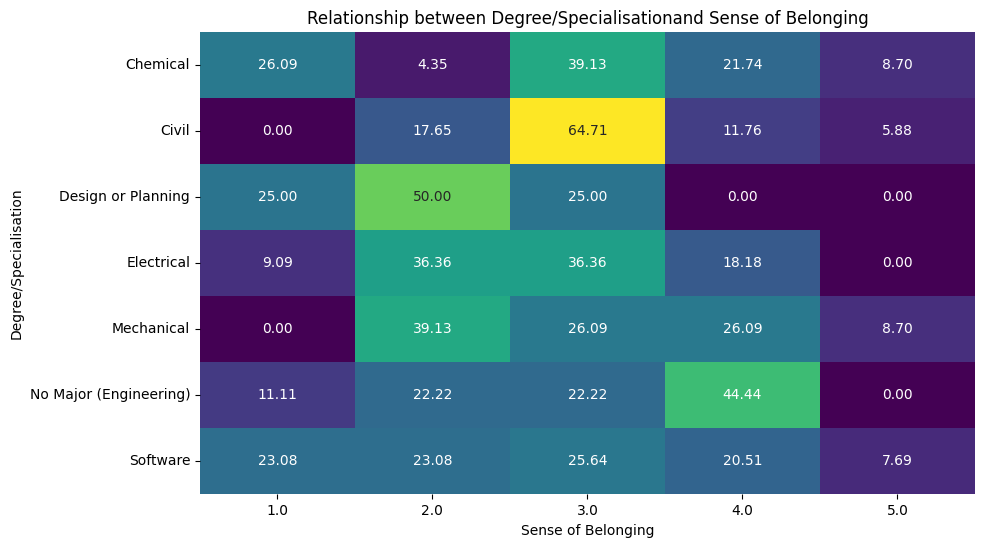

In [22]:
# Degree/Specialisation and Sense of Belonging
degree_belonging = pd.crosstab(df['What is your degree? '], df['How much do you feel a sense of belonging in EAIT faculty?'], normalize='index') * 100
plt.figure(figsize=(10, 6))
sns.heatmap(degree_belonging, annot=True, fmt='.2f', cmap='viridis', cbar=False)
plt.title('Relationship between Degree/Specialisationand Sense of Belonging')
plt.xlabel('Sense of Belonging')
plt.ylabel('Degree/Specialisation')
plt.show()